In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# De scikit-learn...

In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

In [3]:
### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [7]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [4]:
#eliminamos la columna unnamed:0 pq es como un índice
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
#vemos todas las localidades que tiene nuestra base de datos
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
# las localidades que queremos evaluar son Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport. El resto las eliminamos según el enunciado del tp
categorias_importantes = [' Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport' ]
df_filtrado = df[df['Location'].isin(categorias_importantes)]

In [8]:
#miramos cuantos datos nos quedan en el data set, las variables y su tipo y cuantos datos nulos tienen
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25041 entries, 6047 to 102519
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              25041 non-null  object 
 1   Location          25041 non-null  object 
 2   MinTemp           24473 non-null  float64
 3   MaxTemp           24485 non-null  float64
 4   Rainfall          24157 non-null  float64
 5   Evaporation       22176 non-null  float64
 6   Sunshine          19751 non-null  float64
 7   WindGustDir       23421 non-null  object 
 8   WindGustSpeed     23424 non-null  float64
 9   WindDir9am        23667 non-null  object 
 10  WindDir3pm        24620 non-null  object 
 11  WindSpeed9am      24688 non-null  float64
 12  WindSpeed3pm      24706 non-null  float64
 13  Humidity9am       24106 non-null  float64
 14  Humidity3pm       24156 non-null  float64
 15  Pressure9am       24210 non-null  float64
 16  Pressure3pm       24219 non-null  float64

In [9]:
### Cantidad de valores faltantes.

df_filtrado.isna().sum()

Date                   0
Location               0
MinTemp              568
MaxTemp              556
Rainfall             884
Evaporation         2865
Sunshine            5290
WindGustDir         1620
WindGustSpeed       1617
WindDir9am          1374
WindDir3pm           421
WindSpeed9am         353
WindSpeed3pm         335
Humidity9am          935
Humidity3pm          885
Pressure9am          831
Pressure3pm          822
Cloud9am            6175
Cloud3pm            6358
Temp9am              580
Temp3pm              572
RainToday            884
RainTomorrow         883
RainfallTomorrow     883
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Cobar'),
  Text(1, 0, 'Sydney'),
  Text(2, 0, 'SydneyAirport'),
  Text(3, 0, 'Canberra'),
  Text(4, 0, 'MelbourneAirport'),
  Text(5, 0, 'Melbourne'),
  Text(6, 0, 'Dartmoor'),
  Text(7, 0, 'MountGambier')])

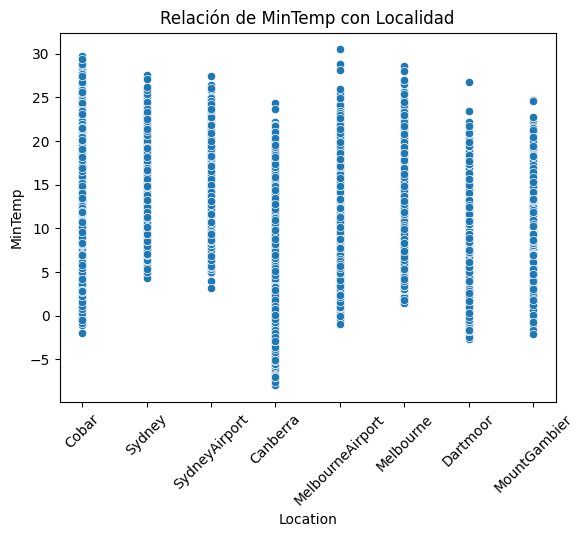

In [12]:
#vemos como se ditribuye la temperatura mínima según las localidades para ver si podemos sacar la media según localidad
sns.scatterplot(x='Location', y='MinTemp', data=df_filtrado)
plt.xlabel('Location')
plt.ylabel('MinTemp')
plt.title('Relación de MinTemp con Localidad')
plt.xticks(rotation= 45)

In [13]:
#como no vemos una gran diferencia vamos a crear una variable que sea epocas del año porque las temperaturas en invierno son diferentes a las del verano por ejemplo.
#primero tengo que convertir a la variable date en tipo datetime
df_filtrado = df_filtrado.copy()  # Crear una copia del DataFrame
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])
df_filtrado['Date'].head()

6047   2009-01-01
6048   2009-01-02
6049   2009-01-03
6050   2009-01-04
6051   2009-01-05
Name: Date, dtype: datetime64[ns]

In [14]:
#armamos una función para determinar las estaciones del año (usamos las estaciones de australia) 
#Otoño: del 1 de marzo al 31 de mayo. 
#Invierno: del 1 de junio al 31 de agosto. 
#Primavera: del 1 de septiembre al 30 de noviembre. 
#Verano: del 1 de diciembre al 28 de febrero.
def determinar_estacion(fecha):
    # extraemos el mes
    mes = fecha.month
    # Determinamos las estaciones
    if  3<= mes <=5:
        return "Otoño"
    elif 6<= mes <= 8:
        return "Invierno"
    elif 9 <= mes <= 11:
        return "Primavera"
    else:
        return "Verano"

# Aplicamos la función determinar_estacion al DataFrame df_filtrado
df_filtrado['Estacion'] = df_filtrado['Date'].apply(lambda x: determinar_estacion(x))

# Mostramos el DataFrame con la nueva columna de estaciones
df_filtrado.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Estacion
6047,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0,Verano
6048,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0,Verano
6049,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,...,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0,Verano
6050,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0,Verano
6051,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0,Verano


In [15]:
df_filtrado['Estacion'].value_counts()

Estacion
Otoño        6568
Invierno     6326
Primavera    6127
Verano       6020
Name: count, dtype: int64

In [16]:
#antes de sacar la media por estación vamos a tener que dividir en train y test para no usar datos de test en los valores de train
df_filtrado.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Estacion
102515,2017-06-20,MountGambier,6.2,16.3,0.0,NaN,NaN,N,41.0,N,...,1026.3,1024.1,NaN,NaN,8.7,15.5,No,Yes,2.0,Invierno
102516,2017-06-21,MountGambier,8.7,13.2,2.0,NaN,NaN,S,20.0,NaN,...,1029.2,1028.3,NaN,8.0,11.1,12.0,Yes,No,0.0,Invierno
102517,2017-06-22,MountGambier,7.0,15.7,0.0,NaN,NaN,N,31.0,N,...,1027.0,1022.4,8.0,NaN,10.0,14.9,No,No,0.0,Invierno
102518,2017-06-23,MountGambier,5.4,16.2,0.0,NaN,NaN,N,37.0,NNW,...,1017.0,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2,Invierno
102519,2017-06-24,MountGambier,4.8,12.3,2.2,NaN,NaN,W,28.0,NNW,...,1020.0,1018.0,5.0,8.0,8.2,11.5,Yes,No,0.6,Invierno


In [ ]:
#acá me faltó hacer un scaterplot de estacion con mintemp para mostrar como se relacionan, mañana veo si lo puedo hacer

In [ ]:
#como tenemos datos desde el 2009 hasta mediados de 2017 vamos a tomar como test el 15% de nuestros datos que sería aproximadamente 15 meses y para hacerlo un poco mas fácil nos quedamos con todo 2016 y todo 2017 como test y usamos el resto como train (es un 18% aprox de mi base de datos)
df_train = df_filtrado.loc[df_filtrado['Date'] < '2016-01-01']
df_test = df_filtrado.loc[df_filtrado['Date'] >= '2016-01-01']